In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from random import sample
from itertools import chain



##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
111447,00030484_001.png,Infiltration|Nodule,1,30484,47,F,PA,1840,2021,0.194311,0.194311,NaN
26825,00007017_009.png,Nodule,9,7017,60,F,PA,2048,2500,0.168000,0.168000,NaN
44126,00011378_000.png,Infiltration,0,11378,55,M,PA,2608,2611,0.143000,0.143000,NaN


In [3]:
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
75175,00018445_002.png,No Finding,2,18445,1,F,AP,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
57309,00014215_000.png,No Finding,0,14215,33,F,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51430,00012993_016.png,Infiltration,16,12993,34,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
len(all_labels)

15

In [5]:
all_xray_df[all_labels].sum()/len(all_xray_df)

Atelectasis           0.103095
Cardiomegaly          0.024759
Consolidation         0.041625
Edema                 0.020540
Effusion              0.118775
Emphysema             0.022440
Fibrosis              0.015037
Hernia                0.002025
Infiltration          0.177435
Mass                  0.051570
No Finding            0.538361
Nodule                0.056466
Pleural_Thickening    0.030191
Pneumonia             0.012763
Pneumothorax          0.047289
dtype: float64

[Text(0, 0.5, 'Number of Images with Label')]

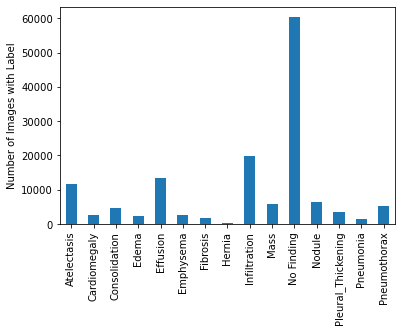

In [6]:
ax = all_xray_df[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

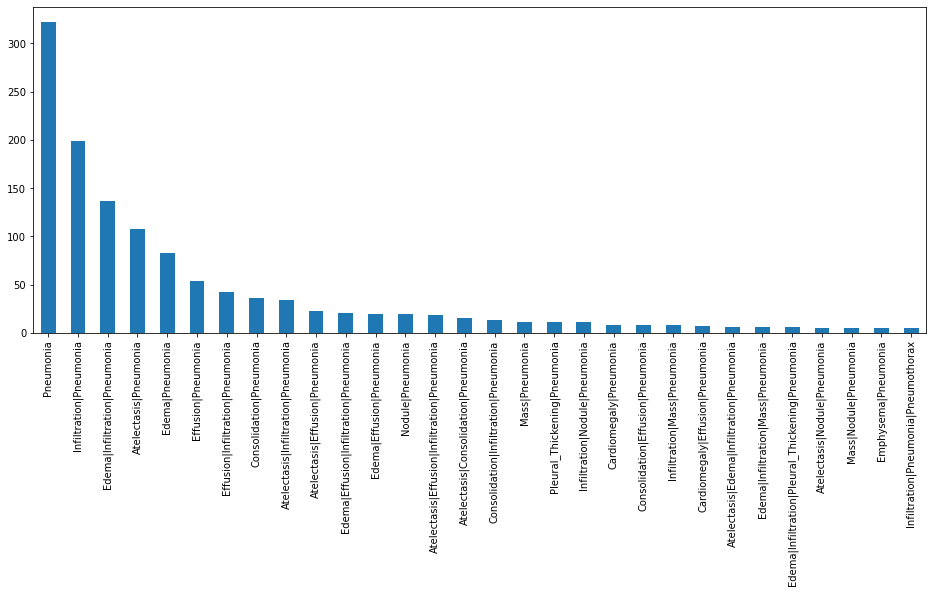

In [7]:
plt.figure(figsize = (16,6))
all_xray_df[all_xray_df.Pneumonia == 1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

In [8]:
len(all_xray_df['Patient Age']>120)


112120

In [9]:
all_xray_df = all_xray_df[all_xray_df['Patient Age']<120]

(array([ 1803.,  5021., 12798., 14580., 18664., 26481., 20790.,  9793.,
         1917.,   257.]),
 array([ 1. , 10.4, 19.8, 29.2, 38.6, 48. , 57.4, 66.8, 76.2, 85.6, 95. ]),
 <a list of 10 Patch objects>)

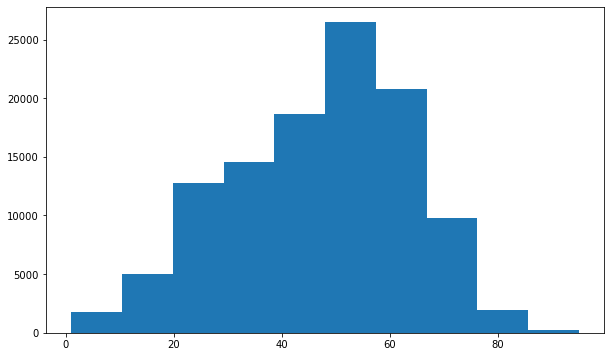

In [10]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df['Patient Age'])

(array([ 41.,  85., 174., 203., 196., 243., 266., 175.,  39.,   8.]),
 array([ 2. , 10.8, 19.6, 28.4, 37.2, 46. , 54.8, 63.6, 72.4, 81.2, 90. ]),
 <a list of 10 Patch objects>)

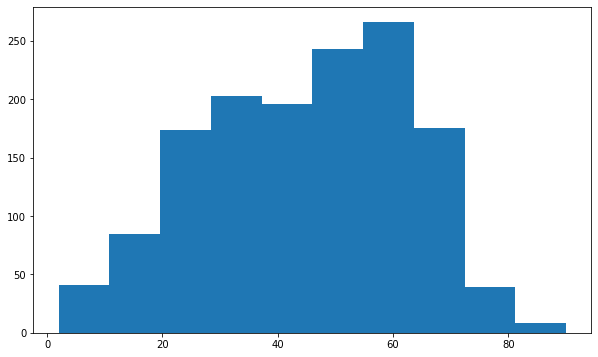

In [11]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df[all_xray_df.Pneumonia==1]['Patient Age'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(array([ 13.,  44.,  76.,  85.,  82.,  92., 107.,  90.,  15.,   1.]),
 array([ 2. , 10.8, 19.6, 28.4, 37.2, 46. , 54.8, 63.6, 72.4, 81.2, 90. ]),
 <a list of 10 Patch objects>)

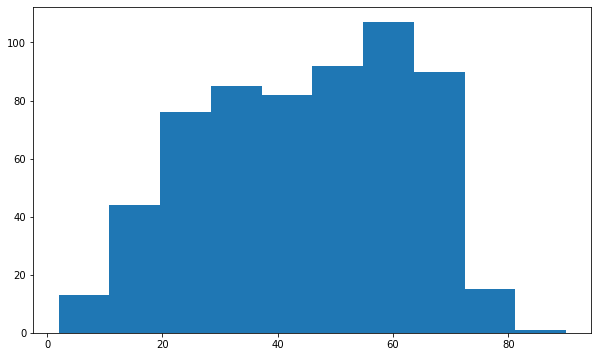

In [12]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df[all_xray_df.Pneumonia==1][all_xray_df.Infiltration==1]['Patient Age'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(array([ 6., 10., 17., 16., 28., 52., 51., 53., 24.,  5.]),
 array([ 3. , 10.9, 18.8, 26.7, 34.6, 42.5, 50.4, 58.3, 66.2, 74.1, 82. ]),
 <a list of 10 Patch objects>)

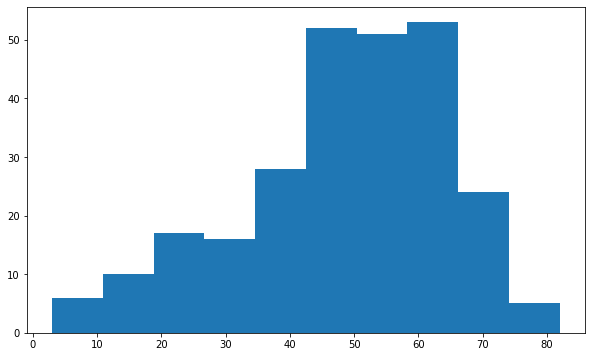

In [13]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df[all_xray_df.Pneumonia==1][all_xray_df.Atelectasis==1]['Patient Age'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(array([11., 16., 27., 53., 39., 44., 40., 57., 38., 15.]),
 array([ 5. , 12.2, 19.4, 26.6, 33.8, 41. , 48.2, 55.4, 62.6, 69.8, 77. ]),
 <a list of 10 Patch objects>)

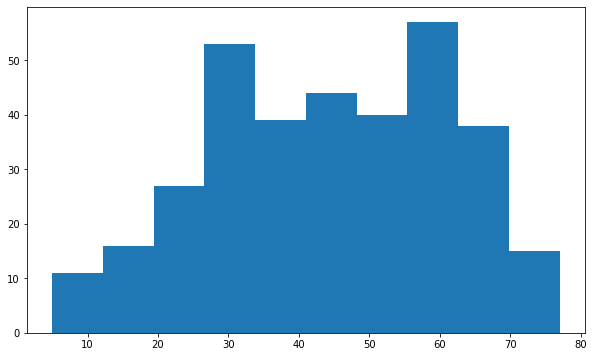

In [14]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df[all_xray_df.Pneumonia==1][all_xray_df.Edema==1]['Patient Age'])

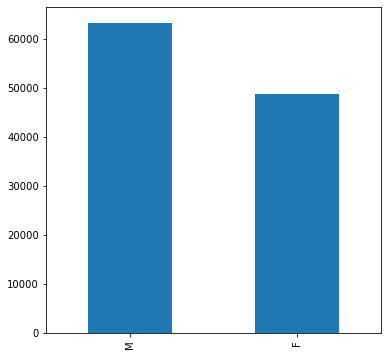

In [15]:
plt.figure(figsize=(6,6))
all_xray_df['Patient Gender'].value_counts().plot(kind='bar')

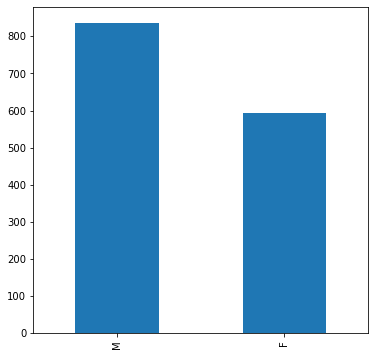

In [16]:
plt.figure(figsize=(6,6))
all_xray_df[all_xray_df.Pneumonia == 1]['Patient Gender'].value_counts().plot(kind = 'bar')

In [17]:
data_sample = pd.read_csv('sample_labels.csv')

In [18]:
all_labels = np.unique(list(chain(*data_sample['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        data_sample[c_label] = data_sample['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
data_sample.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
1640,00008522_017.png,No Finding,17,8522,061Y,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4270,00021047_006.png,Pleural_Thickening,6,21047,052Y,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1689,00008797_000.png,No Finding,0,8797,046Y,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
data_sample_paths = {os.path.basename(x): x for x       
                     in glob(os.path.join('/data','images*', '*', 
                     '*.png'))}
data_sample['path'] = data_sample['Image Index'].map(data_sample_paths.get)

sample_df1

In [20]:
len(data_sample)

5606

In [21]:
data1 = data_sample.sample(8)
data1

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,path
2041,00010583_015.png,Effusion|Fibrosis,15,10583,057Y,M,PA,2992,2991,0.143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_005/images/00010583_015.png
1140,00005986_009.png,No Finding,9,5986,033Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/data/images_003/images/00005986_009.png
3873,00019092_013.png,Atelectasis,13,19092,045Y,F,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_009/images/00019092_013.png
2102,00010815_009.png,Emphysema|Mass,9,10815,066Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,/data/images_005/images/00010815_009.png
2751,00013774_035.png,Infiltration,35,13774,077Y,F,AP,2500,2048,0.168,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_007/images/00013774_035.png
4323,00021290_004.png,No Finding,4,21290,067Y,F,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/data/images_010/images/00021290_004.png
935,00004893_020.png,No Finding,20,4893,028Y,M,AP,2500,2048,0.171,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/data/images_003/images/00004893_020.png
3336,00016492_000.png,Infiltration,0,16492,047Y,F,PA,2650,2397,0.143,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_008/images/00016492_000.png


In [22]:
data_sample['path'].sample(8)

2844    /data/images_007/images/00014116_006.png
3087    /data/images_007/images/00015186_000.png
1488    /data/images_004/images/00007735_027.png
2719    /data/images_006/images/00013642_000.png
2136    /data/images_005/images/00011019_000.png
4236    /data/images_009/images/00020837_000.png
1023    /data/images_003/images/00005365_002.png
2127    /data/images_005/images/00010953_011.png
Name: path, dtype: object

In [23]:

data1_images = list(data1.iloc[:,-1])
data1_xspace = list(data1.iloc[:, 7])
data1_yspace = list(data1.iloc[:, 8])

In [24]:
data1_images

['/data/images_005/images/00010583_015.png',
 '/data/images_003/images/00005986_009.png',
 '/data/images_009/images/00019092_013.png',
 '/data/images_005/images/00010815_009.png',
 '/data/images_007/images/00013774_035.png',
 '/data/images_010/images/00021290_004.png',
 '/data/images_003/images/00004893_020.png',
 '/data/images_008/images/00016492_000.png']

8


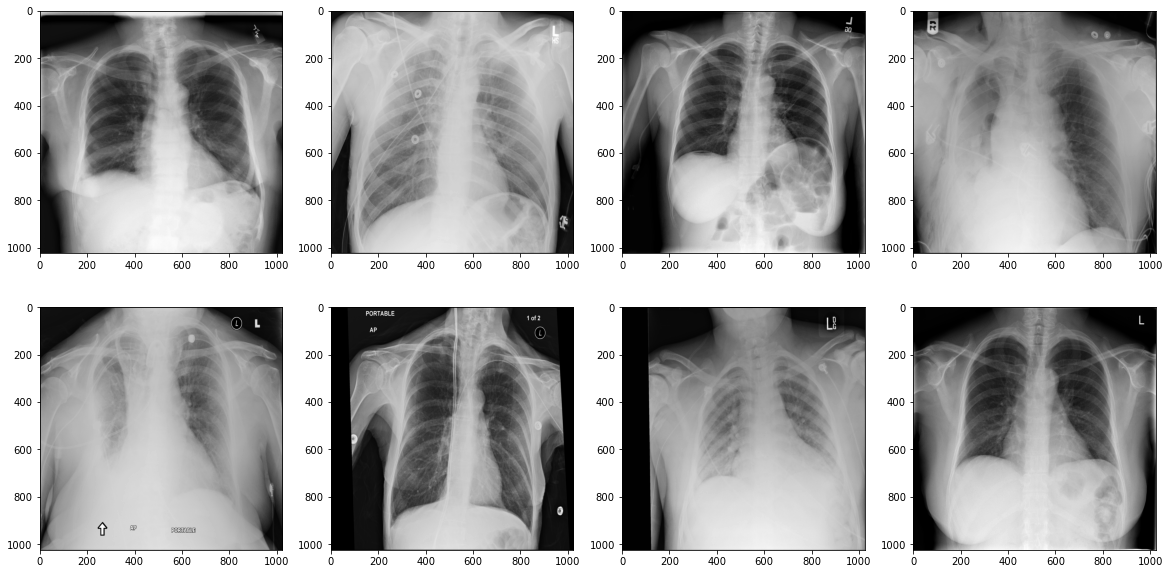

In [25]:
fig, m_axs = plt.subplots(2,4, figsize = (20,10))
m_axs = m_axs.flatten()
print(len(m_axs))
for i in range(len(data1_images)):
    img=mpimg.imread(data1_images[i])
    m_axs[i].imshow(img, cmap='gray')

(array([4.2958e+04, 1.1320e+04, 1.9029e+04, 2.3836e+04, 2.3020e+03,
        1.7530e+03, 1.5740e+03, 1.4820e+03, 1.5260e+03, 1.5290e+03,
        1.4400e+03, 1.3970e+03, 1.2850e+03, 1.2620e+03, 1.2620e+03,
        1.2170e+03, 1.1580e+03, 1.2230e+03, 1.1600e+03, 1.1860e+03,
        1.1670e+03, 1.2050e+03, 1.2390e+03, 1.3170e+03, 1.4820e+03,
        1.5970e+03, 1.7420e+03, 1.9760e+03, 2.1450e+03, 2.3020e+03,
        2.4740e+03, 2.6540e+03, 2.8550e+03, 3.1370e+03, 3.2600e+03,
        3.4460e+03, 3.4240e+03, 3.2480e+03, 3.2830e+03, 3.1780e+03,
        3.2850e+03, 3.4310e+03, 3.3960e+03, 3.5570e+03, 3.7490e+03,
        3.9230e+03, 4.1830e+03, 4.4580e+03, 4.7280e+03, 4.6560e+03,
        4.8400e+03, 4.7980e+03, 4.8540e+03, 4.8550e+03, 4.7410e+03,
        4.8570e+03, 4.8050e+03, 4.8360e+03, 5.0830e+03, 4.9670e+03,
        4.8710e+03, 4.9000e+03, 4.8850e+03, 4.7470e+03, 4.7750e+03,
        4.6570e+03, 4.5280e+03, 4.6050e+03, 4.5620e+03, 4.4660e+03,
        4.4780e+03, 4.3380e+03, 4.3270e+03, 4.18

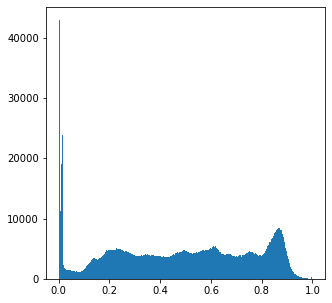

In [26]:
plt.figure(figsize=(5,5))
plt.hist(img.ravel(), bins = 256)

In [27]:
mean_intensity = np.mean(img)
mean_intensity

0.4753266

In [28]:
std_intensity = np.std(img)
std_intensity

0.28187746

In [29]:
new_img = img.copy()
new_img = (new_img - mean_intensity)/std_intensity
new_img


array([[-1.3523924 , -1.4358664 , -1.5193403 , ..., -0.16984548,
         0.08057621, -0.5733027 ],
       [-1.3663048 , -1.4776033 , -1.5193403 , ..., -0.39244255,
        -0.12810853, -0.72633815],
       [-1.3802171 , -1.463691  , -1.5193403 , ..., -0.54547805,
        -0.32288095, -0.851549  ],
       ...,
       [-1.6445512 , -1.6445512 , -1.6445512 , ...,  0.4005596 ,
         0.79010445, -0.1002839 ],
       [-1.6445512 , -1.6445512 , -1.6445512 , ...,  0.44229653,
         0.87357837, -0.01681   ],
       [-1.6445512 , -1.6445512 , -1.6445512 , ...,  0.8318414 ,
         1.388334  ,  0.28926107]], dtype=float32)

(array([4.2958e+04, 1.1320e+04, 1.9029e+04, 2.3836e+04, 2.3020e+03,
        1.7530e+03, 1.5740e+03, 1.4820e+03, 1.5260e+03, 1.5290e+03,
        1.4400e+03, 1.3970e+03, 1.2850e+03, 1.2620e+03, 1.2620e+03,
        1.2170e+03, 1.1580e+03, 1.2230e+03, 1.1600e+03, 1.1860e+03,
        1.1670e+03, 1.2050e+03, 1.2390e+03, 1.3170e+03, 1.4820e+03,
        1.5970e+03, 1.7420e+03, 1.9760e+03, 2.1450e+03, 2.3020e+03,
        2.4740e+03, 2.6540e+03, 2.8550e+03, 3.1370e+03, 3.2600e+03,
        3.4460e+03, 3.4240e+03, 3.2480e+03, 3.2830e+03, 3.1780e+03,
        3.2850e+03, 3.4310e+03, 3.3960e+03, 3.5570e+03, 3.7490e+03,
        3.9230e+03, 4.1830e+03, 4.4580e+03, 4.7280e+03, 4.6560e+03,
        4.8400e+03, 4.7980e+03, 4.8540e+03, 4.8550e+03, 4.7410e+03,
        4.8570e+03, 4.8050e+03, 4.8360e+03, 5.0830e+03, 4.9670e+03,
        4.8710e+03, 4.9000e+03, 4.8850e+03, 4.7470e+03, 4.7750e+03,
        4.6570e+03, 4.5280e+03, 4.6050e+03, 4.5620e+03, 4.4660e+03,
        4.4780e+03, 4.3380e+03, 4.3270e+03, 4.18

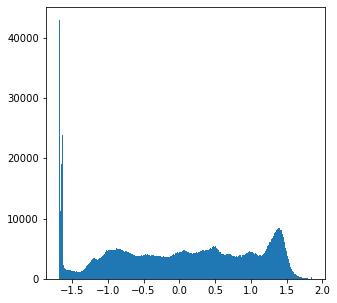

In [30]:
plt.figure(figsize=(5,5))
plt.hist(new_img.ravel(), bins = 256)

In [31]:
data1Pneumonia= data_sample[data_sample.Pneumonia ==1]
len(data1Pneumonia)

62

In [32]:
data1Infiltrate = data_sample[data_sample.Infiltration ==1]
len(data1Infiltrate)

967

In [33]:
data1Healthy = data_sample[data_sample['No Finding'] == 1]
len(data1Healthy)

3044

8
0.11078432
0.17404643
0.0
0.16871937
0.19678693
0.2288833
0.2591797
0.77812886
Pneumonia


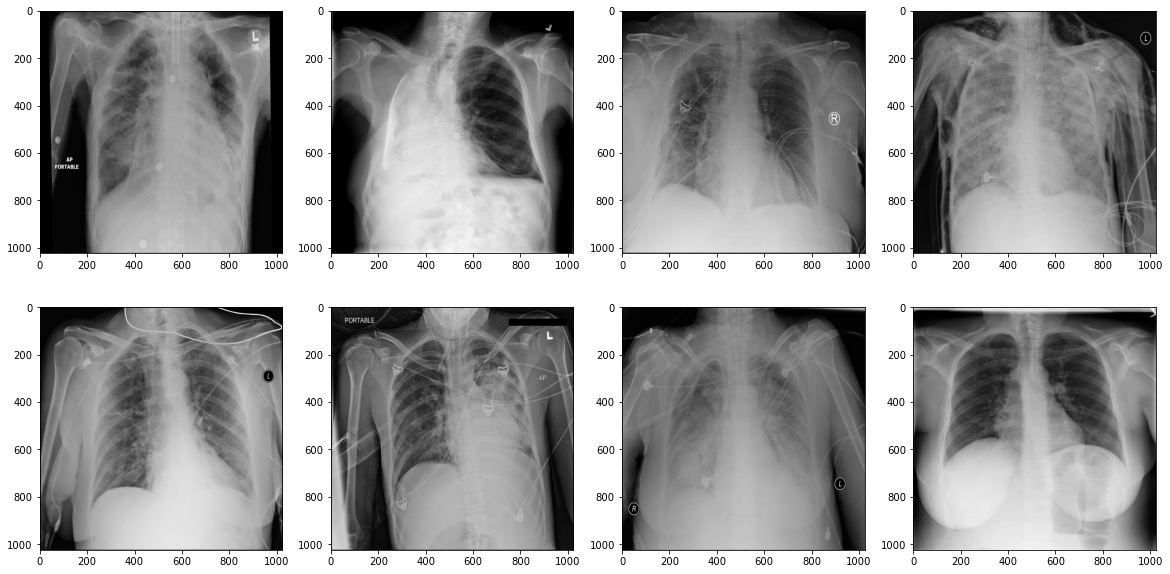

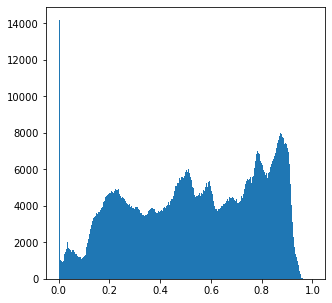

In [34]:
data1_imagesPneumonia = list(data1Pneumonia.iloc[:,-1].sample(8))
fig, m_axs = plt.subplots(2,4, figsize = (20,10))
m_axs = m_axs.flatten()
print(len(m_axs))
for i in range(len(data1_imagesPneumonia)):
    img_Pn=mpimg.imread(data1_imagesPneumonia[i])
    m_axs[i].imshow(img_Pn, cmap='gray')
    mean_intensity_Pn = np.mean(img_Pn[i])
    print(mean_intensity_Pn)
                                                
std_intensity_Pn = np.std(img_Pn)
new_img_Pn = img_Pn.copy()
new_img_Pn = (new_img_Pn - mean_intensity_Pn)/std_intensity_Pn
plt.figure(figsize=(5,5))
plt.hist(img_Pn.ravel(), bins = 256)

print('Pneumonia')


In [35]:
mean_intensity_Pn

0.77812886

8
0.8960249
0.6832606
0.60203743
0.34679842
0.47260645
0.14923024
0.2900812
0.29673713
Infiltration


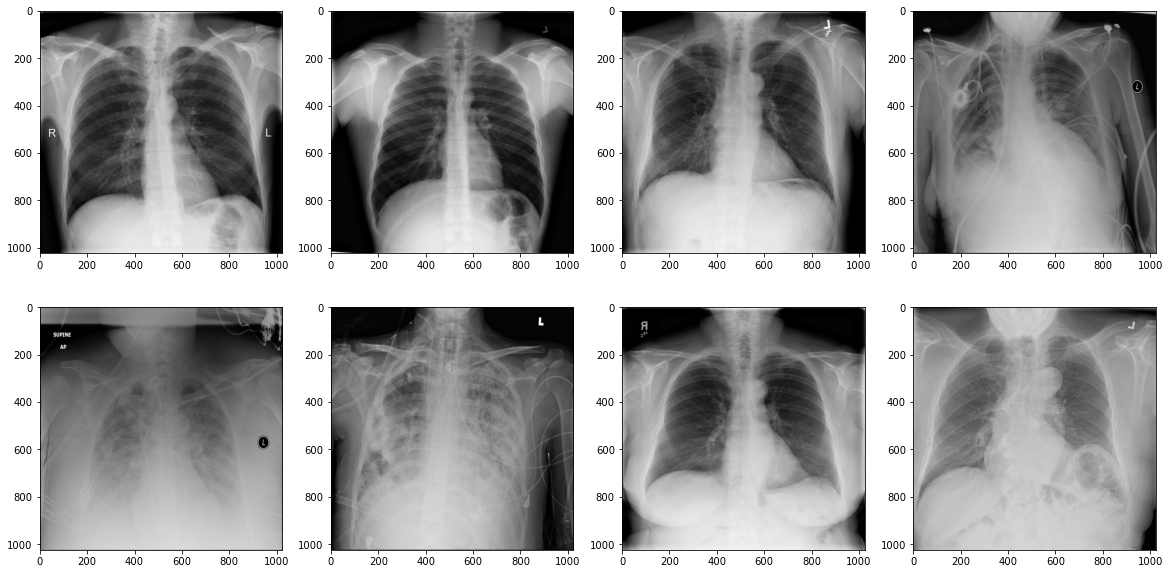

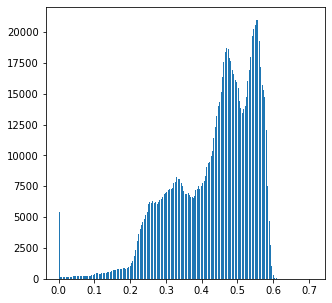

In [36]:
data1_imagesInfiltrate = list(data1Infiltrate.iloc[:,-1].sample(8))
fig, m_axs = plt.subplots(2,4, figsize = (20,10))
m_axs = m_axs.flatten()
print(len(m_axs))
for i in range(len(data1_imagesInfiltrate)):
    img_Inf=mpimg.imread(data1_imagesInfiltrate[i])
    m_axs[i].imshow(img_Inf, cmap='gray')
    mean_intensity_Inf = np.mean(img_Inf[i])
    print(mean_intensity_Inf)

std_intensity_Inf = np.std(img_Inf)
new_img_Inf = img_Inf.copy()
new_img_Inf = (new_img_Inf - mean_intensity_Inf)/std_intensity_Inf
plt.figure(figsize=(5,5))
plt.hist(img_Inf.ravel(), bins = 256)
print('Infiltration')

In [37]:
mean_intensity_Inf

0.29673713

8
0.09357767
0.283858
0.26781175
0.25942862
0.2664101
0.17333028
0.881407
0.34517848
No Disease


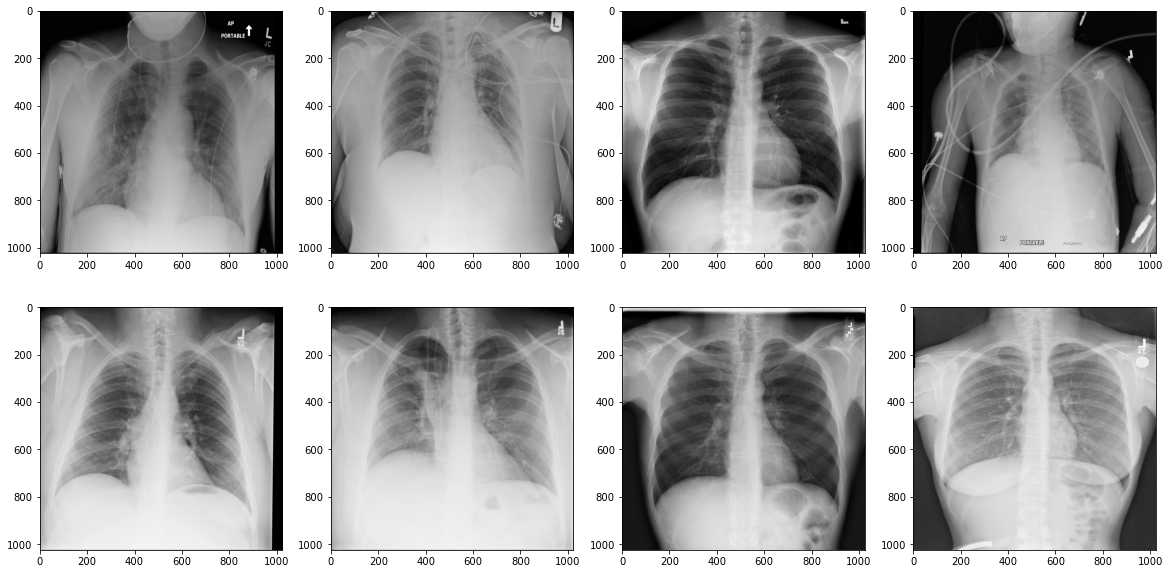

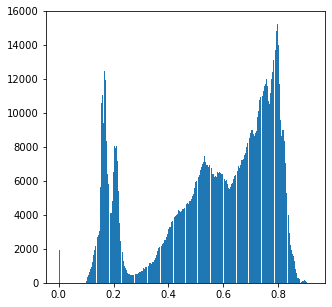

In [38]:
data1_imagesHealthy = list(data1Healthy.iloc[:,-1].sample(8))
fig, m_axs = plt.subplots(2,4, figsize = (20,10))
m_axs = m_axs.flatten()
print(len(m_axs))
for i in range(len(data1_imagesHealthy)):
    img_H=mpimg.imread(data1_imagesHealthy[i])
    m_axs[i].imshow(img_H, cmap='gray')
    mean_intensity_H = np.mean(img_H[i])
    print(mean_intensity_H)

std_intensity_H = np.std(img_H)
new_img_H = img_H.copy()
new_img_H = (new_img_H - mean_intensity_H)/std_intensity_H
plt.figure(figsize=(5,5))
plt.hist(img_H.ravel(), bins = 256)
print('No Disease')

In [39]:
mean_intensity_H

0.34517848

In [40]:
all_xray_dfcalc = all_xray_df.drop(['No Finding'], axis=1)
all_xray_dfcalc1= all_xray_dfcalc.iloc[:,-14:-1]

In [41]:
sum_rows = []
for i in range(1,len(all_xray_dfcalc1)):
    sum_rows.append((np.sum(all_xray_dfcalc1.iloc[i,:])))
mean_diagnoses = float(np.sum(sum_rows)/len(sum_rows))

In [42]:
mean_diagnoses


0.6767169478069276